# Customer Lifetime Value Project – EDA Notebook 🧠📊

## Objective 📌

This notebook performs exploratory data analysis (EDA) on the customer purchase dataset, focusing on RFM (Recency, Frequency, Monetary, AveragePurchaseValue, CustomerLifespan, MeanDaysBetweenPurchases) features and deriving Customer Lifetime Value (CLV).

The goal is to understand customer purchasing behavior to support further modeling (e.g., churn prediction, segmentation, CLV regression).

---

## 1. Load RFM Data

In [3]:
import sys
import os
os.chdir("..")
# Добавляем src в sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))


In [25]:
import pandas as pd
from src.data_preparation.prepare_data import load_raw_data, clean_data
from src.feature_engineering.engineer_features import create_rfm_features

df = clean_data(load_raw_data())
rfm_df = create_rfm_features(df, customer_id_col='CustomerID', invoice_date_col='Order date', amount_col='TotalPrice')

rfm_df.head()

,Recency,Frequency,Monetary,AveragePurchaseValue,CustomerLifespan,MeanDaysBetweenPurchases
CustomerID,,,,,,
R_01vNIayewjIIKMF,797,140,4920.01,35.142929,2081,14.864286
R_037XK72IZBJyF69,611,1213,17589.89,14.501146,2401,1.979390
R_038ZU6kfQ5f89fH,904,69,4247.54,61.558551,2067,29.956522
R_03aEbghUILs9NxD,544,173,3882.98,22.444971,2406,13.907514
R_06RZP9pS7kONINr,639,430,11223.70,26.101628,2396,5.572093


In [37]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5027 entries, R_01vNIayewjIIKMF to R_zfqnsBzlOAKibzb
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Recency                   5027 non-null   int64  
 1   Frequency                 5027 non-null   int64  
 2   Monetary                  5027 non-null   float64
 3   AveragePurchaseValue      5027 non-null   float64
 4   CustomerLifespan          5027 non-null   int64  
 5   MeanDaysBetweenPurchases  5027 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 404.0+ KB


## 2. Summary Statistics

In [26]:
rfm_df.describe()

,Recency,Frequency,Monetary,AveragePurchaseValue,CustomerLifespan,MeanDaysBetweenPurchases
count,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000
mean,618.701611,368.155361,8763.404241,26.201522,2247.062861,27.214318
std,146.768395,426.407538,9782.756813,12.404197,309.012763,64.522061
min,0.000000,1.000000,1.840000,1.840000,0.000000,0.000000
25%,534.000000,92.000000,2254.065000,19.053317,2238.000000,4.785410
50%,603.000000,232.000000,5706.990000,23.856875,2392.000000,9.744939
75%,637.000000,489.000000,11706.020000,29.994104,2412.000000,23.737895
max,2245.000000,5415.000000,115391.180000,194.203256,2418.000000,1169.500000


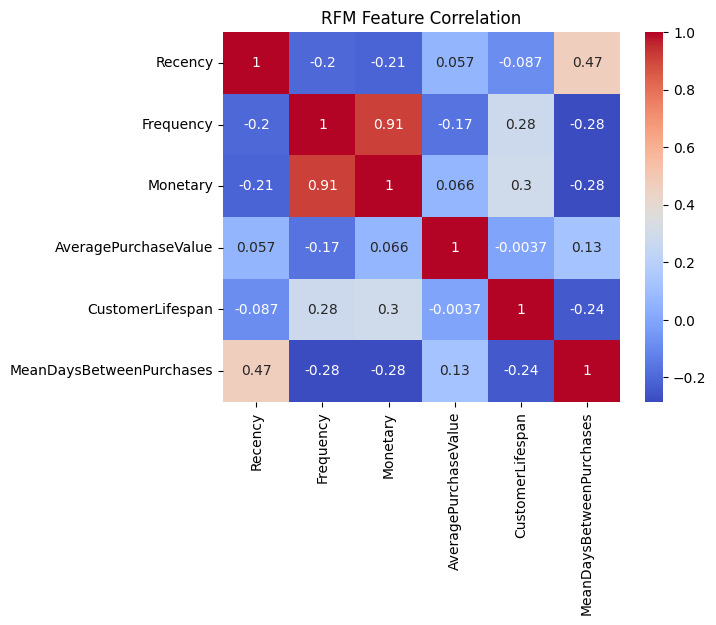

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(rfm_df.corr(), annot=True, cmap='coolwarm')
plt.title("RFM Feature Correlation")
plt.show()

## 3. Distributions

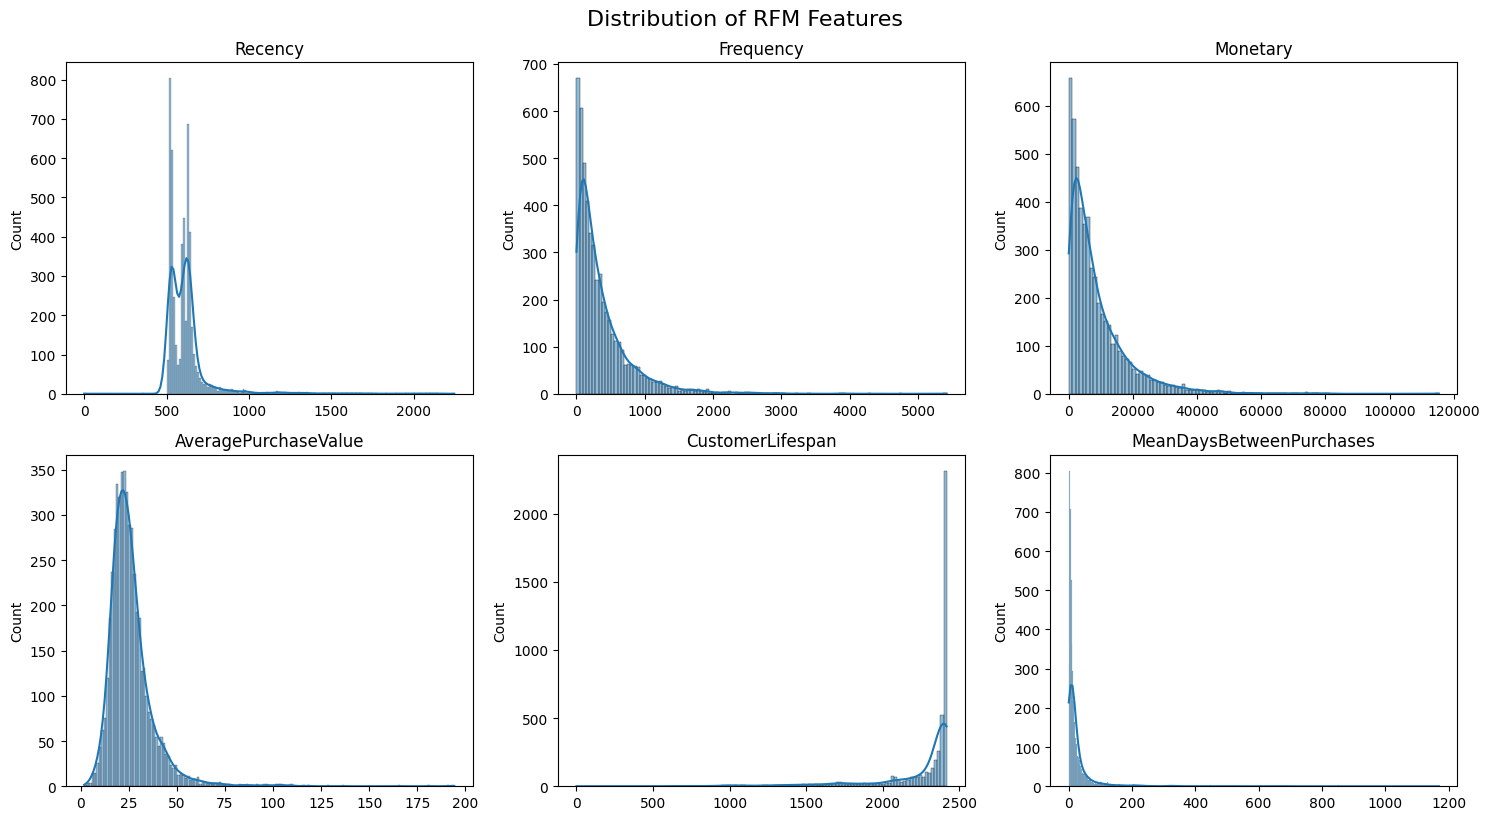

In [29]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(rfm_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(rfm_df[col], kde=True)
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Distribution of RFM Features", fontsize=16, y=1.02)
plt.show()

## 4. Features outliers

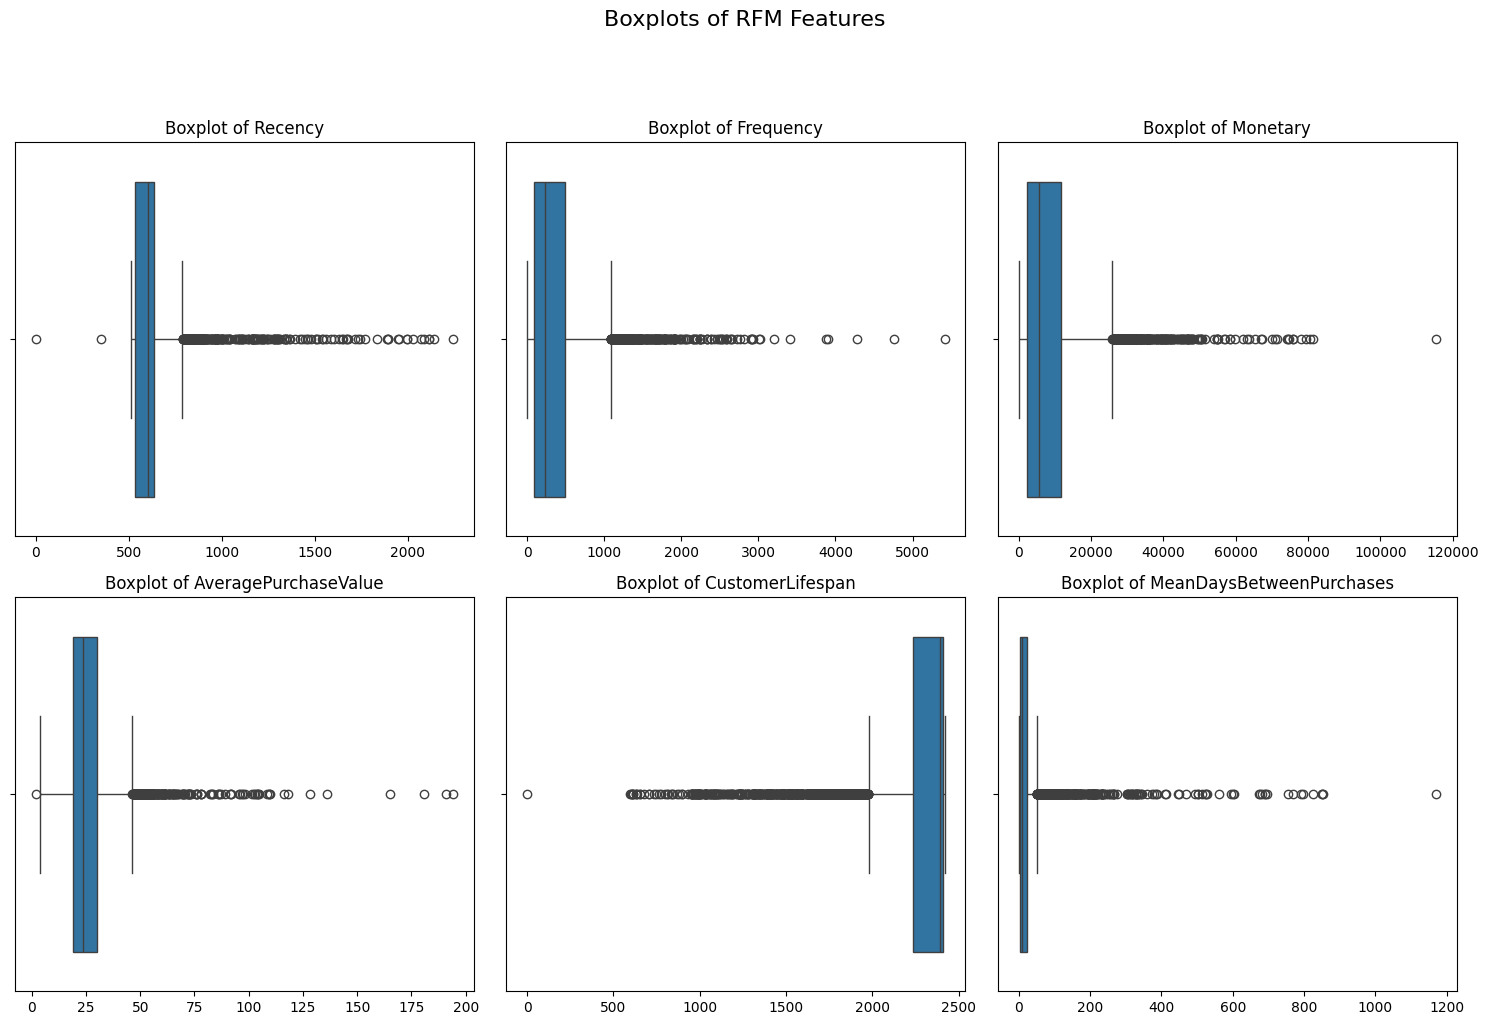

In [30]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(rfm_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=rfm_df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel("")

plt.suptitle("Boxplots of RFM Features", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [31]:
import numpy as np

for col in rfm_df.columns:
    q1 = rfm_df[col].quantile(0.25)
    q3 = rfm_df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = rfm_df[(rfm_df[col] < (q1 - 1.5 * iqr)) | (rfm_df[col] > (q3 + 1.5 * iqr))]
    print(f'Outliers in {col}: {len(outliers)}')

Outliers in Recency: 270
Outliers in Frequency: 307
Outliers in Monetary: 297
Outliers in AveragePurchaseValue: 240
Outliers in CustomerLifespan: 666
Outliers in MeanDaysBetweenPurchases: 559


## 5. Logarithmic transformation

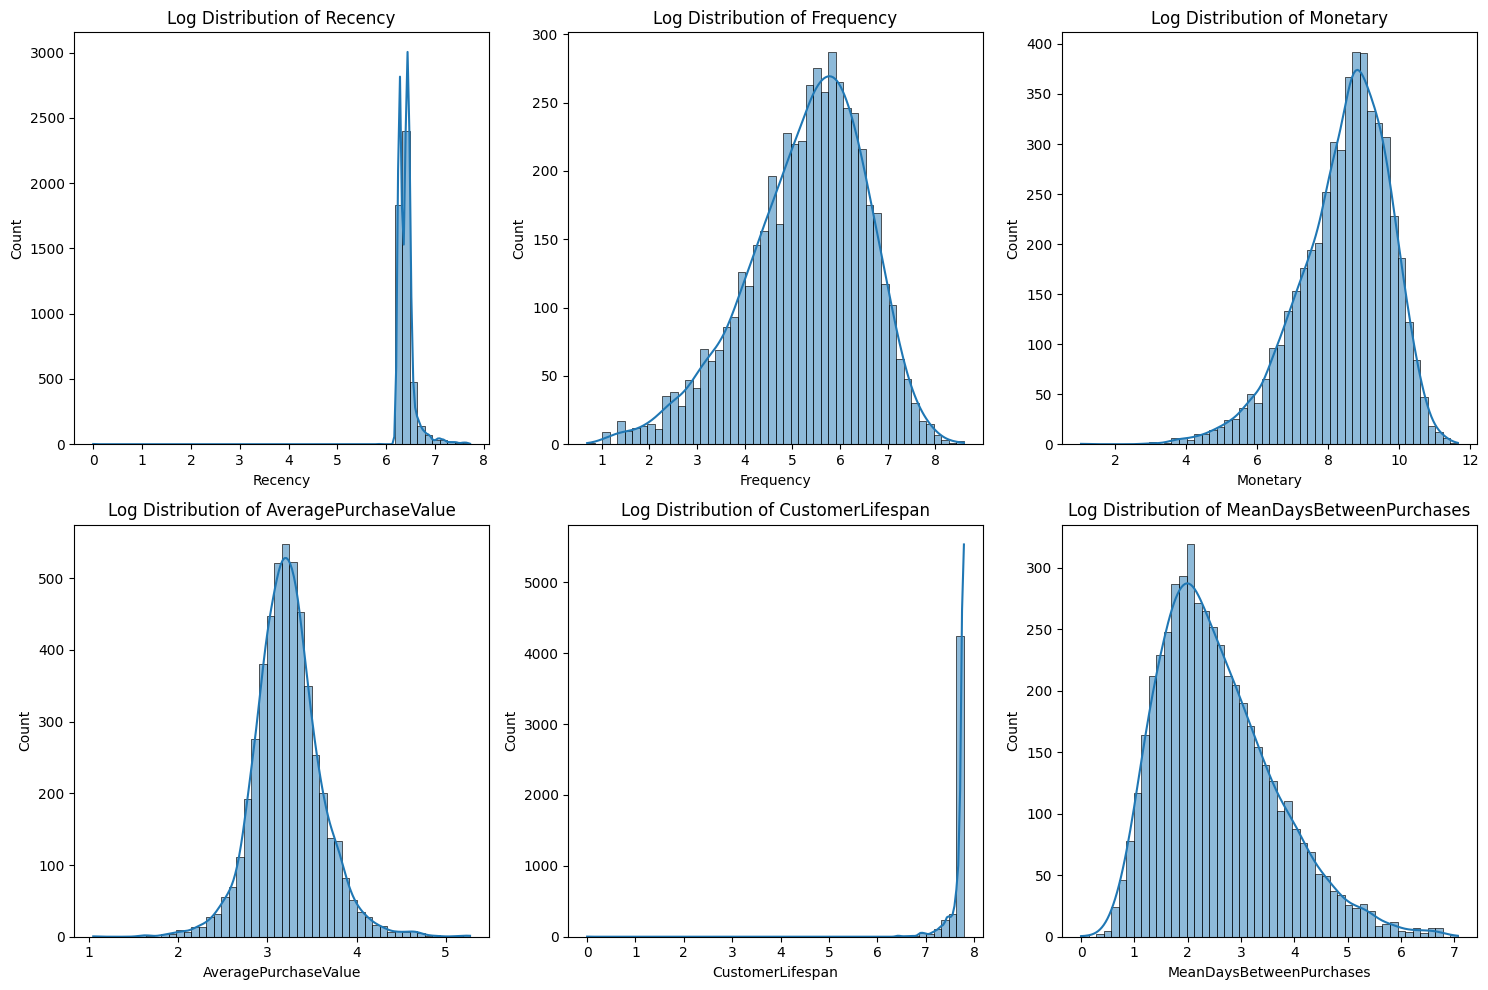

In [32]:
log_rfm = np.log1p(rfm_df)

plt.figure(figsize=(15, 10))
for i, col in enumerate(log_rfm.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(log_rfm[col], bins=50, kde=True)
    plt.title(f'Log Distribution of {col}')
plt.tight_layout()
plt.show()

## 6. CLV Feature Creation

In [33]:
log_rfm["CLV"] = log_rfm["Monetary"] * log_rfm["Frequency"]

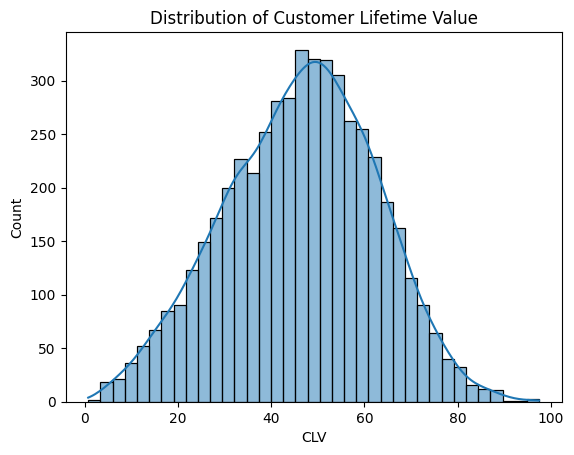

In [34]:
sns.histplot(log_rfm["CLV"], kde=True)
plt.title("Distribution of Customer Lifetime Value")
plt.show()

## 7. Uploading Datase

In [ ]:
log_rfm.to_csv("data/processed/log_rfm_features.csv")